<a href="https://www.kaggle.com/code/pawanthapaliya/guavaa-disease-dataset?scriptVersionId=210384499" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/guava-disease-dataset/dataset_summary.csv
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/72_unsharp_clahe_augmented_6.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/49_unsharp_clahe_augmented_1.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/57_unsharp_clahe_augmented_1.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/97_unsharp_clahe_augmented_3.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/60_unsharp_clahe_augmented_4.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/100_unsharp_clahe_augmented_3.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/26_unsharp_clahe_augmented_1.png
/kaggle/input/guava-disease-dataset/GuavaDiseaseDatase

In [2]:
df=pd.read_csv('/kaggle/input/guava-disease-dataset/dataset_summary.csv')

In [3]:
df.head()

,data_split,sub_directory,image_count
0,val,healthy_guava,185
1,val,fruit_fly,262
2,val,Anthracnose,308
3,test,healthy_guava,94
4,test,fruit_fly,132


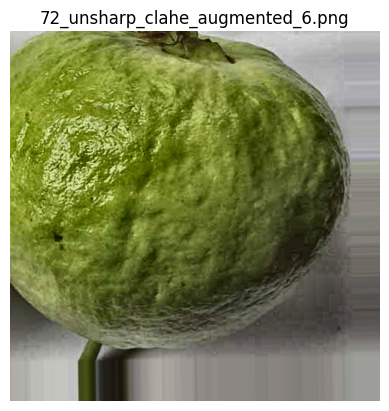

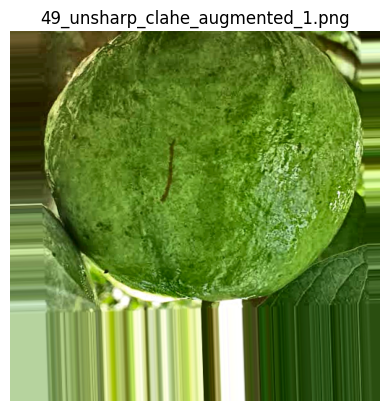

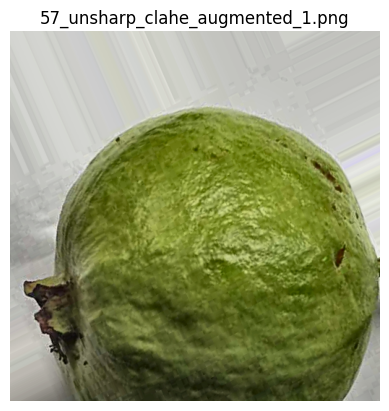

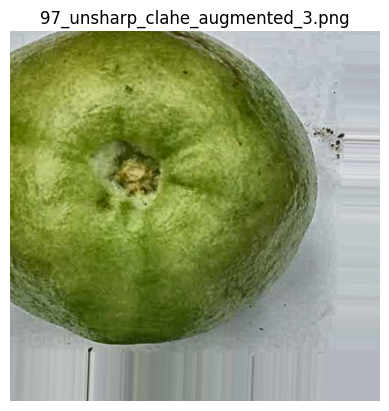

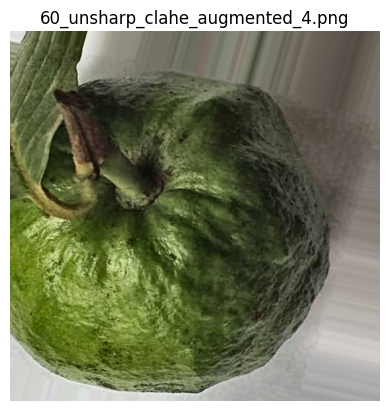

In [4]:
import os
from matplotlib import pyplot as plt
from PIL import Image

# Define the dataset path
val_path = "/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val/healthy_guava/"

# Load and display a few images
image_files = os.listdir(val_path)[:5]  # Load the first 5 images

for img_file in image_files:
    img_path = os.path.join(val_path, img_file)
    img = Image.open(img_path)
    plt.figure()
    plt.imshow(img)
    plt.title(img_file)
    plt.axis("off")
    plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to dataset
train_dir = '/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train'
val_dir = '/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val'

# ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2647 images belonging to 3 classes.
Found 755 images belonging to 3 classes.


In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load pretrained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: healthy, fruit_fly, Anthracnose
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 989s 12s/step - accuracy: 0.7074 - loss: 1.6117 - val_accuracy: 0.9391 - val_loss: 0.1604
Epoch 2/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 990s 12s/step - accuracy: 0.9780 - loss: 0.0655 - val_accuracy: 0.9669 - val_loss: 0.0899
Epoch 3/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 979s 12s/step - accuracy: 0.9956 - loss: 0.0169 - val_accuracy: 0.9775 - val_loss: 0.0627
Epoch 4/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 1023s 12s/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9762 - val_loss: 0.0756
Epoch 5/5
83/83 ━━━━━━━━━━━━━━━━━━━━ 974s 12s/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.9748 - val_loss: 0.0677


In [8]:
test_dir = '/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/test'

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

Found 382 images belonging to 3 classes.
12/12 ━━━━━━━━━━━━━━━━━━━━ 109s 9s/step - accuracy: 0.9683 - loss: 0.0649
Test Accuracy: 0.96


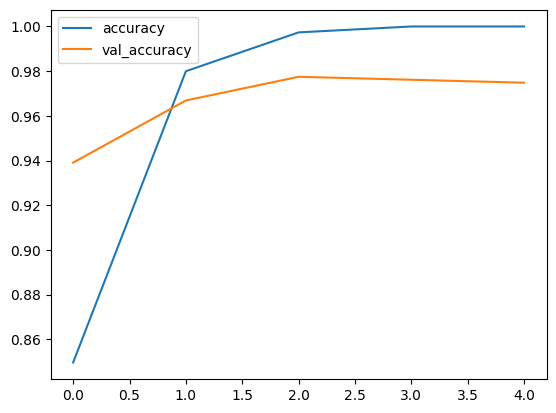

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

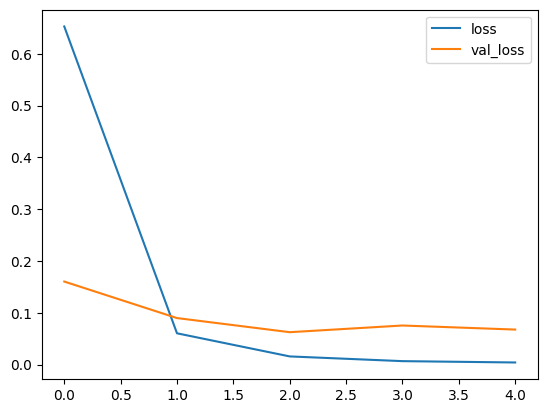

In [10]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()